In [58]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/train.csv


# Loading Data

In [59]:
data=pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
data2=data.copy()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [61]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [62]:
categorical_columns=[col for col in data.columns
                     if (data[col].dtype=='O')]
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [63]:
data=pd.get_dummies(data)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [64]:
missing_columns = data.columns[data.isnull().any()]
print("Columns with missing values:", missing_columns)

Columns with missing values: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [65]:
data.isnull().sum()

Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 290, dtype: int64

In [66]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_data = pd.DataFrame(my_imputer.fit_transform(data))
imputed_data.columns=data.columns
imputed_data.isnull().any().any()

data.isnull().any()

Id                       False
MSSubClass               False
LotFrontage               True
LotArea                  False
OverallQual              False
                         ...  
SaleCondition_AdjLand    False
SaleCondition_Alloca     False
SaleCondition_Family     False
SaleCondition_Normal     False
SaleCondition_Partial    False
Length: 290, dtype: bool

In [67]:
nan_count = data['SalePrice'].isnull().sum()
inf_count = np.isinf(data['SalePrice']).sum()
print(f'NaN count in SalePrice: {nan_count}')
print(f'Infinity count in SalePrice: {inf_count}')

NaN count in SalePrice: 0
Infinity count in SalePrice: 0


In [68]:
imputed_data['SalePrice'].fillna(imputed_data['SalePrice'].median(), inplace=True)

In [69]:
for column in missing_columns:
    data[column].fillna(data[column].median(), inplace=True)

In [70]:
data.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 290, dtype: int64

In [71]:
missing_columns = imputed_data.columns[imputed_data.isnull().any()]
print("Columns with missing values:", missing_columns)

Columns with missing values: Index([], dtype='object')


# **** Correlation of Features

In [72]:
corel=data.corr()

In [73]:
corel = corel.reindex(index=corel.columns, columns=corel.columns)
mask = np.triu(np.ones_like(corel, dtype=bool))
corel

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,-0.051283,0.128995,-0.023074,-0.091864,-0.021725,-0.036570,-0.018040,0.016250,-0.074146,0.127293
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.036570,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018040,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.016250,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.074146,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


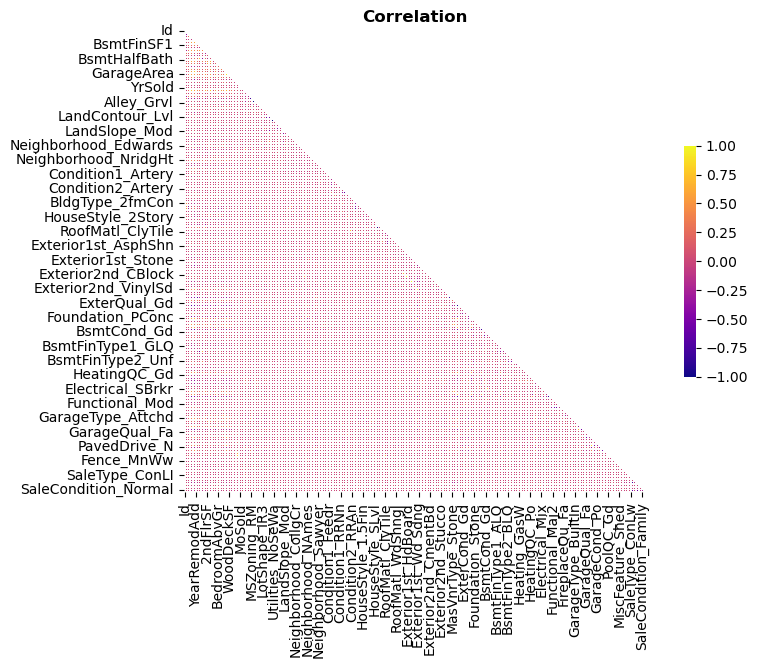

In [74]:
cmap = sns.color_palette("plasma", as_cmap=True)


fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corel, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, fmt=".2f")
ax.set_title('Correlation', weight='bold')
plt.show()


# **** Exploratory Data Analysis

# Relationships between numerical variables

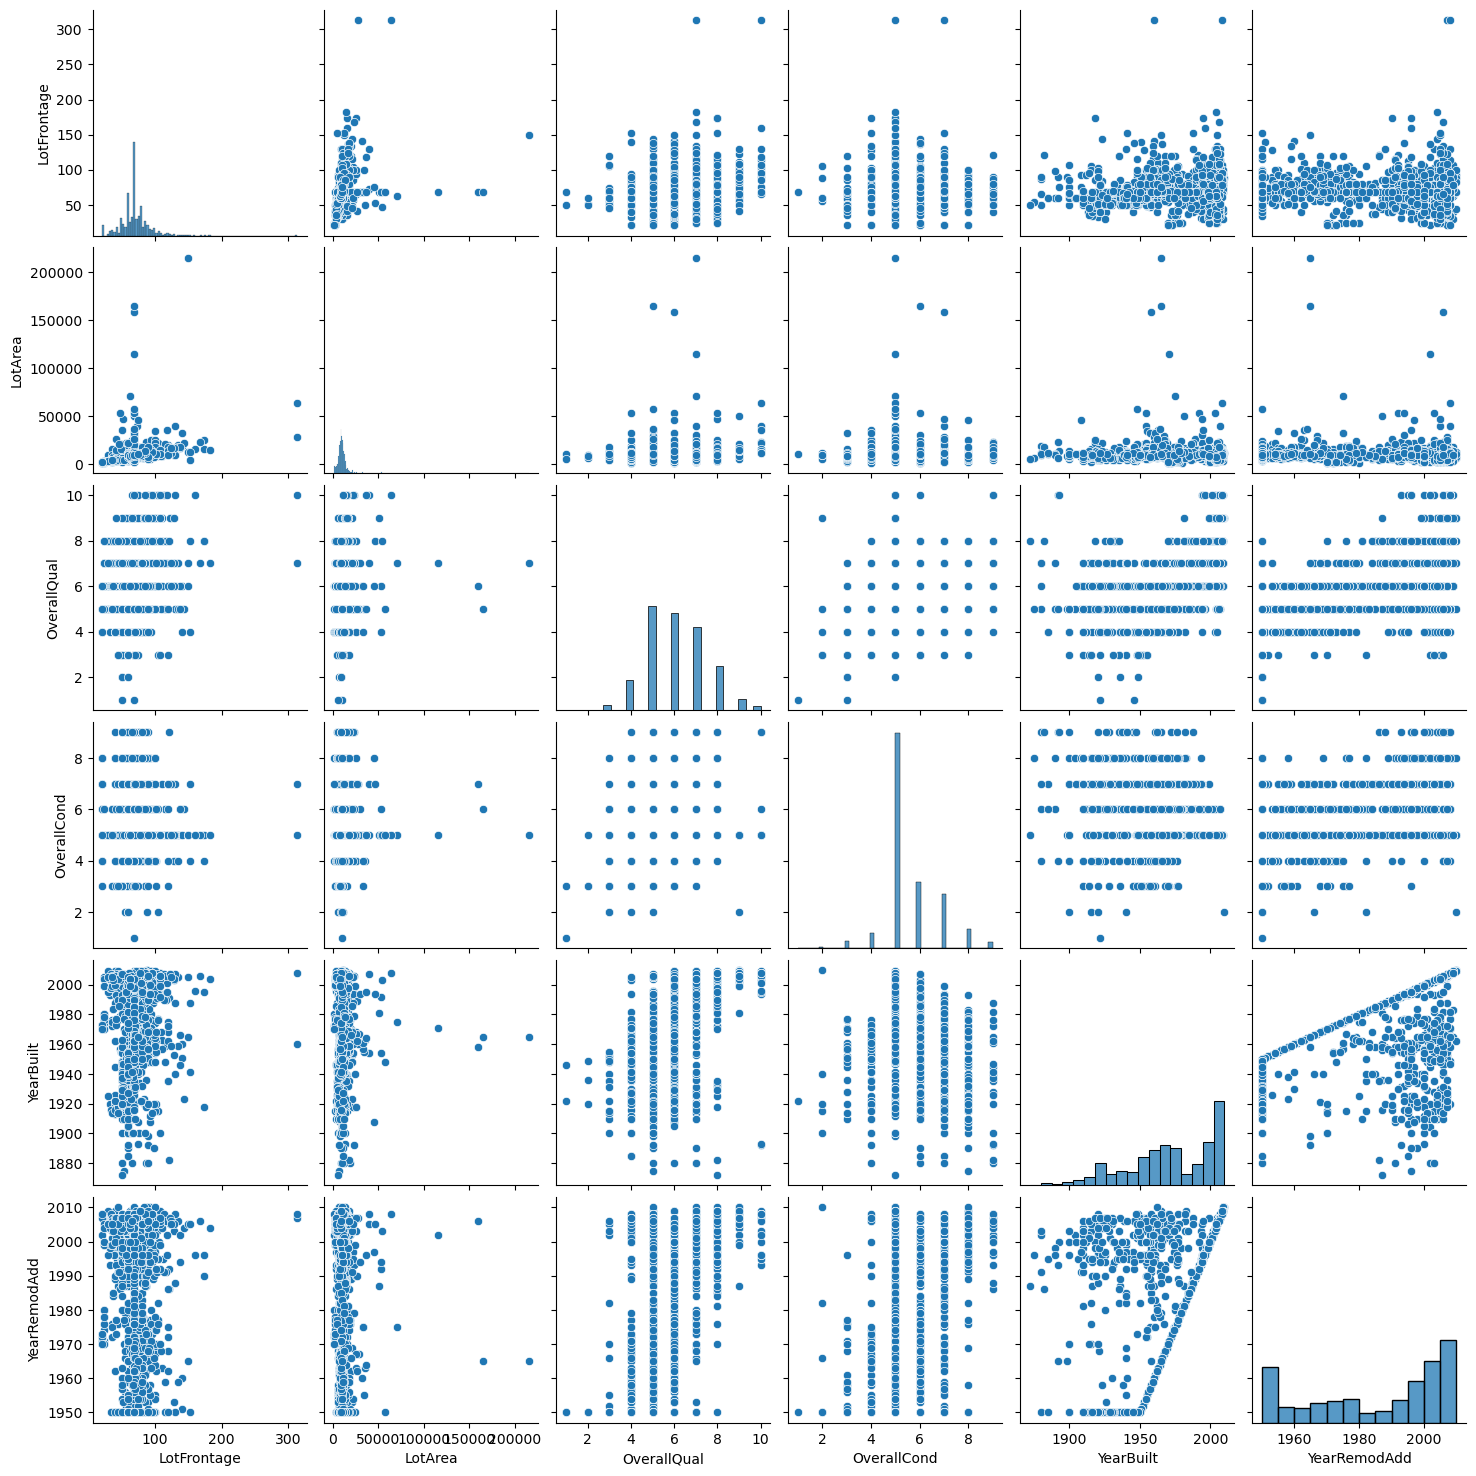

In [75]:
subset_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']

sns.pairplot(data[subset_columns])
plt.show()


# Distributions of individual numerical variables

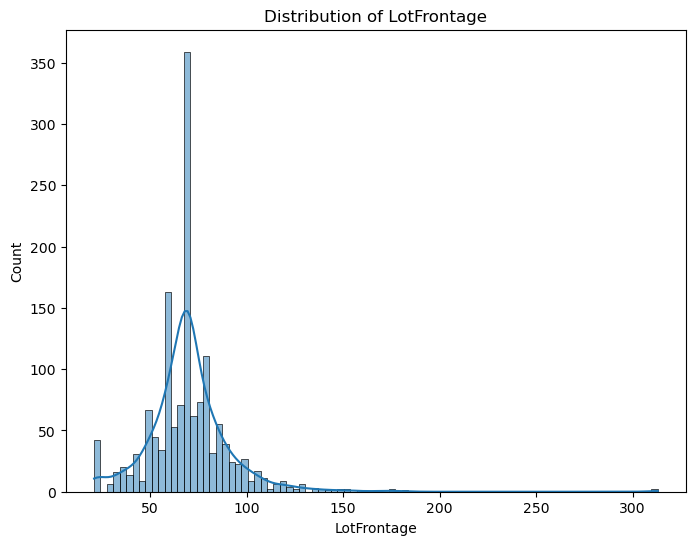

In [76]:
column_to_plot = 'LotFrontage'


plt.figure(figsize=(8, 6))
sns.histplot(data=data, x=column_to_plot, kde=True)
plt.title(f'Distribution of {column_to_plot}')
plt.show()


# Distribution of a numerical variable across different categories

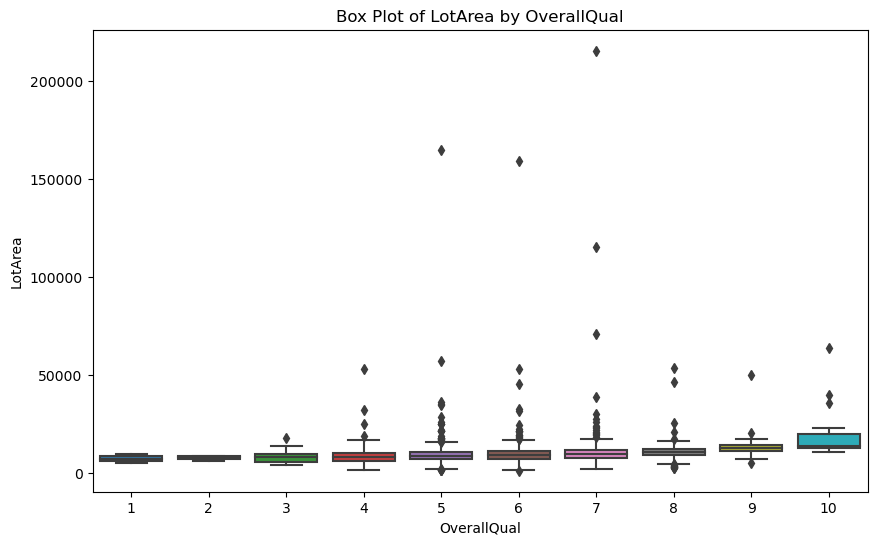

In [77]:
numerical_column = 'LotArea'
categorical_column = 'OverallQual'


plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=categorical_column, y=numerical_column)
plt.title(f'Box Plot of {numerical_column} by {categorical_column}')
plt.show()

# Multivariate Analysis

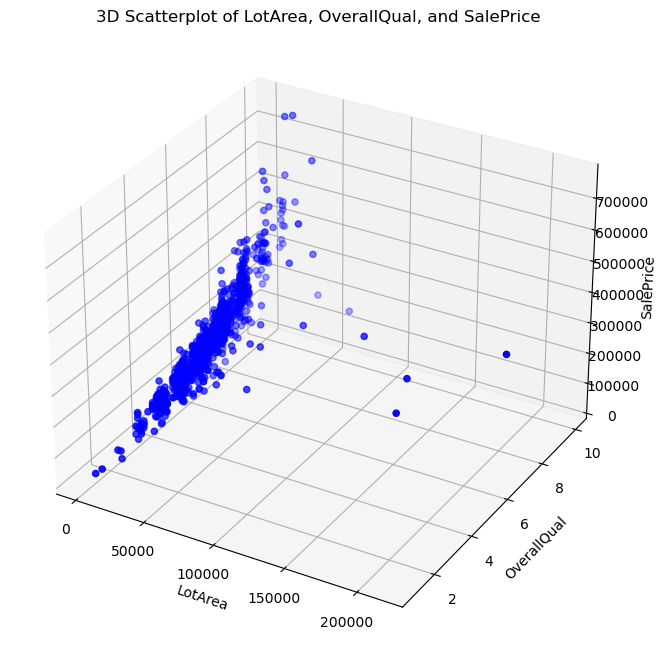

In [78]:
x_column = 'LotArea'
y_column = 'OverallQual'
z_column = 'SalePrice'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[x_column], data[y_column], data[z_column], c='b', marker='o')
ax.set_xlabel(x_column)
ax.set_ylabel(y_column)
ax.set_zlabel(z_column)
plt.title(f'3D Scatterplot of {x_column}, {y_column}, and {z_column}')
plt.show()


# Kernel Density Estimate (KDE) of Sale price

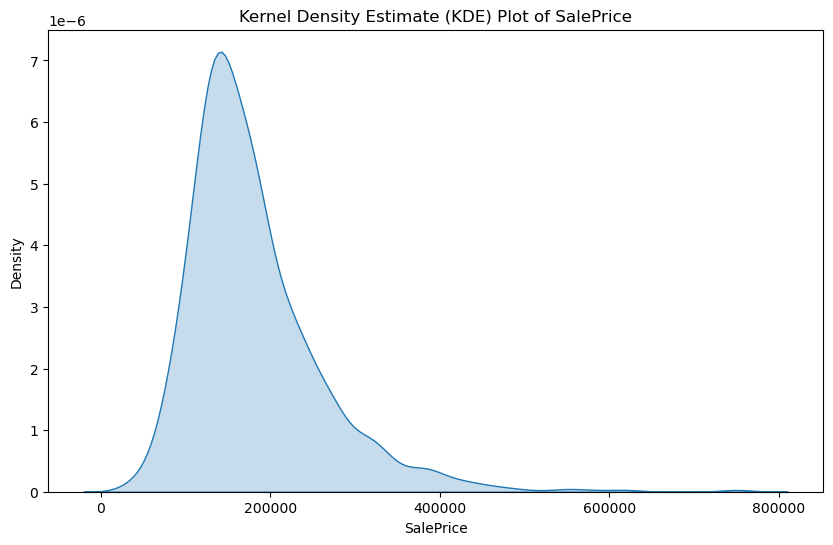

In [79]:
numerical_column = 'SalePrice'  


plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[numerical_column], shade=True)
plt.title(f'Kernel Density Estimate (KDE) Plot of {numerical_column}')
plt.show()


# Box Plot of SalePrice by OverallQual

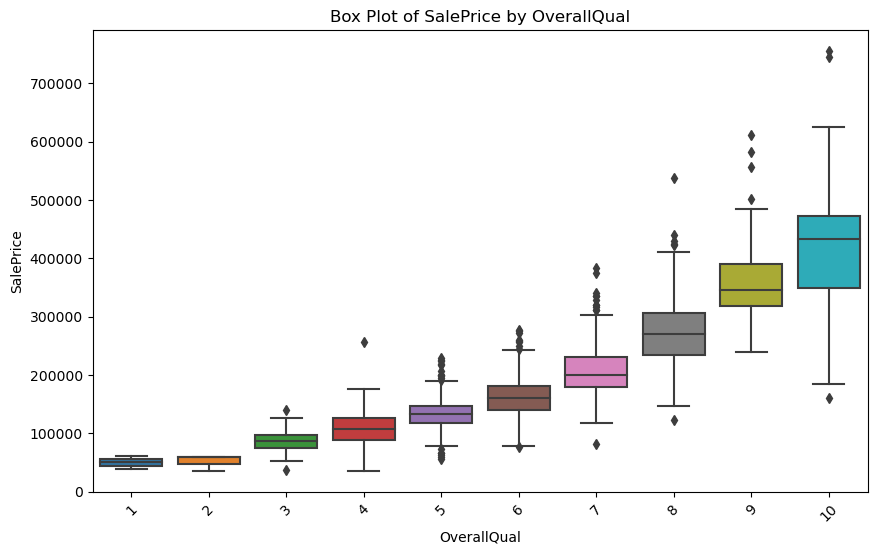

In [80]:
categorical_column = 'OverallQual'
numerical_column = 'SalePrice'

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=categorical_column, y=numerical_column)
plt.title(f'Box Plot of {numerical_column} by {categorical_column}')
plt.xticks(rotation=45)
plt.show()


# **** Modelling

Decision Tree: Validation MAE = 27,283
Random Forest: Validation MAE = 21,857
Linear Regression: Validation MAE = 27,229
K-Nearest Neighbors: Validation MAE = 35,886


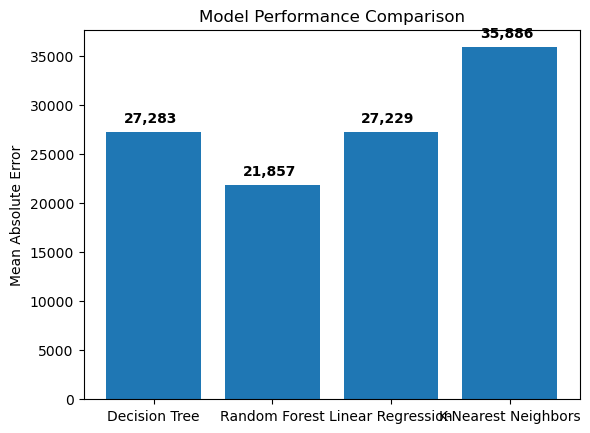

Best model: Random Forest with Validation MAE = 21,857


In [81]:
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

def get_mae(model, train_X, train_y, val_X, val_y):
    model.fit(train_X, train_y)
    val_predictions = model.predict(val_X)
    return mean_absolute_error(val_y, val_predictions)

models = {
    "Decision Tree": DecisionTreeRegressor(max_leaf_nodes=100, random_state=1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=1),
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

mae_results = {}
for model_name, model in models.items():
    mae = get_mae(model, train_X, train_y, val_X, val_y)
    mae_results[model_name] = mae
    print(f"{model_name}: Validation MAE = {mae:,.0f}")

fig, ax = plt.subplots()
ax.bar(mae_results.keys(), mae_results.values())
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Model Performance Comparison')

for i, v in enumerate(mae_results.values()):
    ax.text(i - 0.25, v + 1000, f"{v:,.0f}", color='black', fontweight='bold')

plt.show()

best_model_name = min(mae_results, key=mae_results.get)
best_model_mae = mae_results[best_model_name]
print(f"Best model: {best_model_name} with Validation MAE = {best_model_mae:,.0f}")